## Bike Sharing Case Study.
### Problem Statement
#### A Bike sharing company wants to understand the demand of bikes among prople after covid, so that company can cater there needs and make profit.

In [314]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn 
#from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

### Data Understanding.

In [227]:
#read the dataset
bike = pd.read_csv('/Volumes/Gitesh/Data Folder/BikeSharing/day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [228]:
bike.shape #Shape of bike data

(730, 16)

In [229]:
bike.info  #checking bike Info

<bound method DataFrame.info of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windspee

In [230]:
bike.describe() #checking useful numerical stats.

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [231]:
bike.columns #Cheking the Name of column and releating it with Data Dictionary.

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## Exploratory Data Analysis

#### Instant, Dteday, Casual, Registered column are not imp as per data dictonary so we can proceed without it.

In [232]:
# renaming columns for better understanding. 
bike.rename(columns={'season':'Season','yr':'Year','mnth':'Month','hum':'Humidity',
                     'weathersit':'Weather','cnt':'Count'}, inplace=True)

In [233]:
# creating new data by removing extra columns. We have drop 4 col i.e. Instant,dteday,Casual,registered.

imp_cols = ['Season', 'Year', 'Month', 'holiday', 'weekday', 'workingday', 'Weather', 'temp', 'atemp', 
            'Humidity', 'windspeed','Count']

bike_1 = bike[imp_cols]
bike_1.head()

,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,Count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## We have numberical value to lots of columns.

### We need to give meaningful value to columns data.

In [336]:
bike_1.weekday.describe()

count    730.000000
mean       2.997260
std        2.006161
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max        6.000000
Name: weekday, dtype: float64

In [235]:
# As per Reademe.txt ,season (1:spring, 2:summer, 3:fall, 4:winter)
bike_1['Season'] = bike_1['Season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [236]:
# As per data set , yr : year (0: 2018, 1:2019)
bike_1['Year'] = bike_1['Year'].map({0:'2018',1:'2019'})

In [237]:
# Setting Months Variable.
bike_1['Month'] = bike_1['Month'].map({1:'Jan',2:'Feb',3:'Mar',4:'April',
                                       5:'May',6:'June',7:'July',8:'Aug',
                                       9:'Sept',10:'Oct',11:'Nov',12:'Dec'})

In [238]:
bike_1['workingday'] = bike_1['workingday'].map({0:'No',1:'Yes'})

In [239]:
# Mapping Weather as per Readme.txt
bike_1['Weather'] = bike_1['Weather'].map({1:"Partly/Clear",2:'Moderate/Misty',3:'Bad/LightRain',4:'Snow/HeavyRain'})

### Data Visualisation.

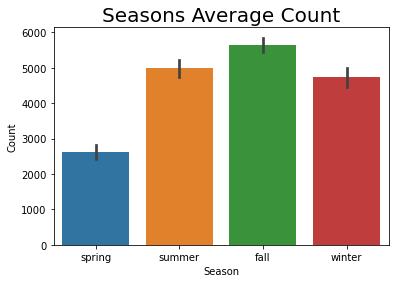

In [240]:
# Season Data
sns.barplot(bike_1['Season'],bike_1['Count'])
plt.title('Seasons Average Count', fontsize = 20)
plt.show()

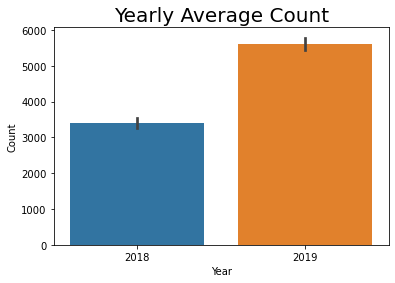

In [241]:
# Yearly Data
sns.barplot(bike_1['Year'],bike_1['Count'])
plt.title('Yearly Average Count', fontsize = 20)
plt.show()

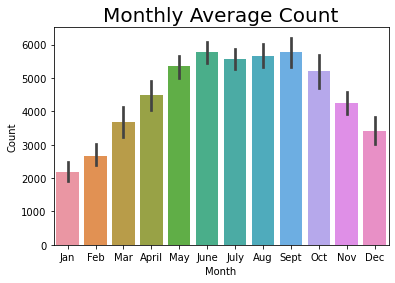

In [242]:
# Monthly Data
sns.barplot(bike_1['Month'],bike_1['Count'])
plt.title('Monthly Average Count', fontsize = 20)
plt.show()

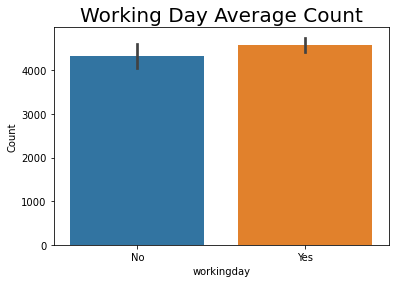

In [243]:
# Working Day Data
sns.barplot(bike_1['workingday'],bike_1['Count'])

plt.title('Working Day Average Count', fontsize = 20)
plt.show()

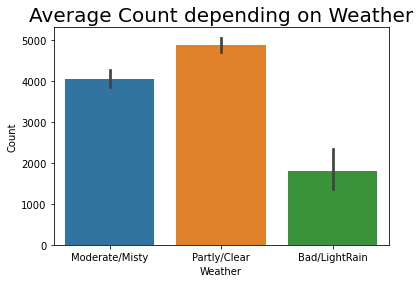

In [244]:
# Weather Data.
sns.barplot(bike_1['Weather'],bike_1['Count'])
plt.title('Average Count depending on Weather', fontsize = 20)
plt.show()

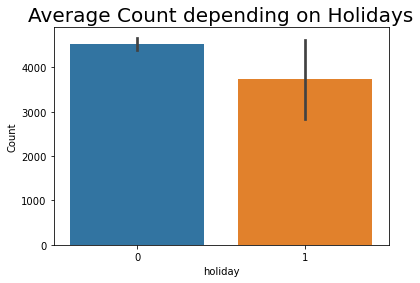

In [245]:
# Holiday Data 
sns.barplot(bike_1['holiday'],bike_1['Count'])
plt.title('Average Count depending on Holidays', fontsize = 20)
plt.show()

## Compraison of Target Variable with predicated Variable.

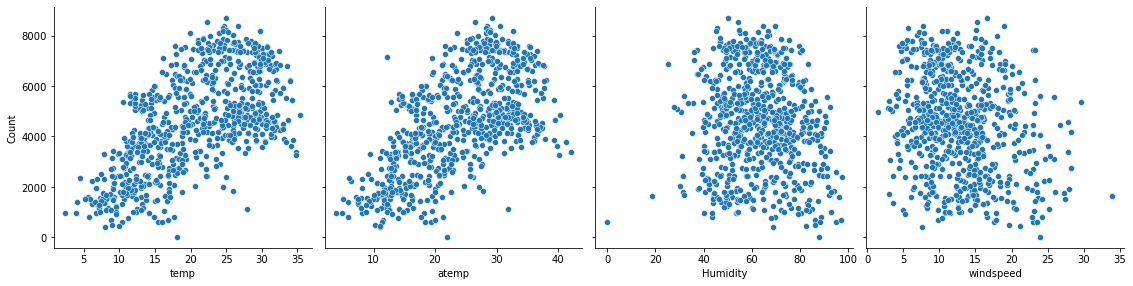

In [246]:
sns.pairplot(bike_1, x_vars=['temp','atemp','Humidity','windspeed'], y_vars='Count',size=4, aspect=1, kind='scatter', diag_kind = None)
plt.show()

## Data Prepration.

In [364]:
# Predicative Data Set

Pred = ['Season','Year','Month','holiday','workingday','Weather']

for i in Pred:
    bike_1[i] = bike_1[i].astype('category')

In [365]:
bike_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Season      730 non-null    category
 1   Year        730 non-null    category
 2   Month       730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    int64   
 5   workingday  730 non-null    category
 6   Weather     730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   Humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  Count       730 non-null    int64   
dtypes: category(6), float64(4), int64(2)
memory usage: 39.7 KB


In [361]:
dummy = pd.get_dummies(bike_1[Pred], drop_first=True)
dummy.head()

,Season_spring,Season_summer,Season_winter,Year_2019,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sept,holiday_1,workingday_Yes,Weather_Moderate/Misty,Weather_Partly/Clear
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1


In [378]:
bike2 = pd.concat([bike_1,dummy], axis=1)
bike2.Count

0       985
1       801
2      1349
3      1562
4      1600
       ... 
725    2114
726    3095
727    1341
728    1796
729    2729
Name: Count, Length: 730, dtype: int64

In [379]:
bike2.drop(Pred, axis=1, inplace = True)

In [381]:
bike2.head()

,weekday,temp,atemp,Humidity,windspeed,Count,Season_spring,Season_summer,Season_winter,Year_2019,...,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sept,holiday_1,workingday_Yes,Weather_Moderate/Misty,Weather_Partly/Clear
0,6,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,3,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


## Train the test Split.

In [382]:
# splitting the date into train and test frames.

df_train_bike2, df_test_bike2 = train_test_split(bike2, train_size=0.70, random_state=100)

In [383]:
print(df_train_bike2.shape)
print(df_test_bike2.shape)

(510, 25)
(220, 25)


In [385]:
scaler = MinMaxScaler()
bike2.columns

Index(['weekday', 'temp', 'atemp', 'Humidity', 'windspeed', 'Count',
       'Season_spring', 'Season_summer', 'Season_winter', 'Year_2019',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_July',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sept', 'holiday_1', 'workingday_Yes', 'Weather_Moderate/Misty',
       'Weather_Partly/Clear'],
      dtype='object')

In [389]:
num_vars = ['temp', 'atemp', 'Humidity', 'windspeed', 'Count']

df_train_bike2[num_vars] = scaler.fit_transform(df_train_bike2[num_vars])
df_train_bike2[num_vars].head()

,temp,atemp,Humidity,windspeed,Count
576,0.815169,0.766351,0.725633,0.264686,0.827658
426,0.442393,0.438975,0.640189,0.255342,0.465255
728,0.245101,0.200348,0.498067,0.663106,0.204096
482,0.395666,0.391735,0.504508,0.188475,0.482973
111,0.345824,0.318819,0.751824,0.380981,0.191095


In [346]:
df_train_bike2.weekday

576    2
426    6
728    0
482    6
111    5
      ..
578    4
53     3
350    6
79     1
520    2
Name: weekday, Length: 510, dtype: int64

## Check multicollinearity

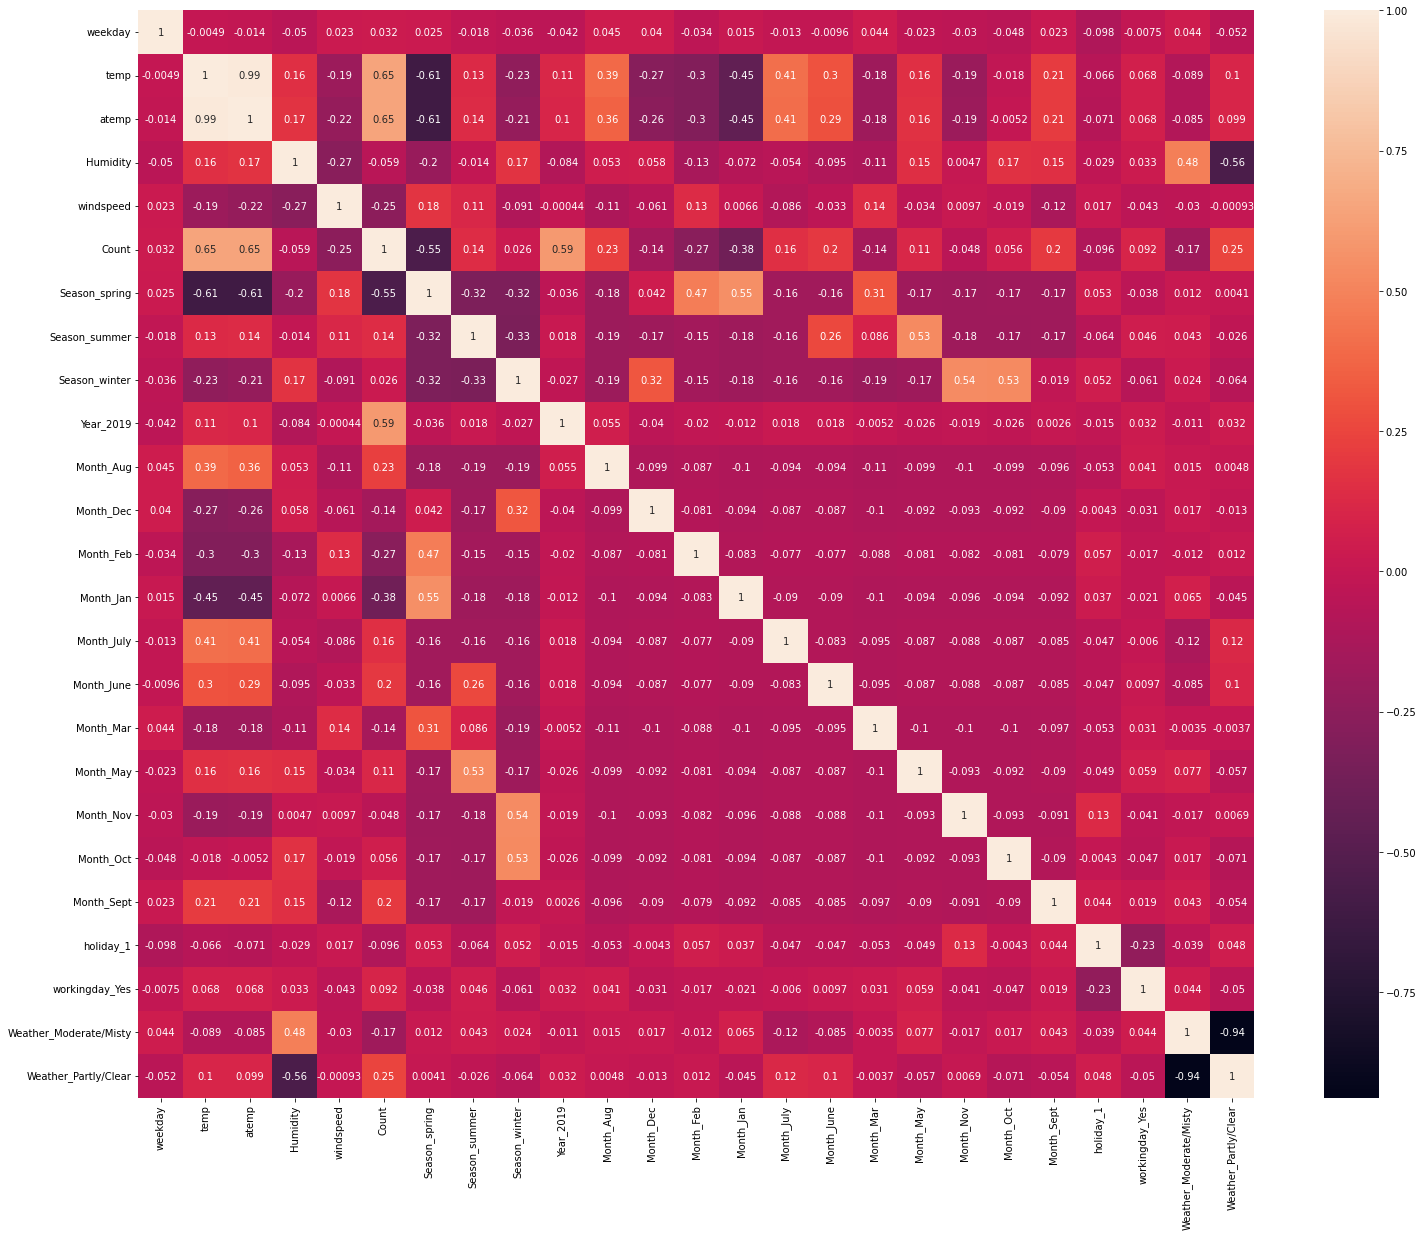

In [390]:
plt.figure(figsize = [25,20])
sns.heatmap(df_train_bike2.corr(),annot =True)
plt.show()

## Model Building

In [392]:
y_train = df_train_bike2.pop('Count')
X_train = df_train_bike2

print(y_train.shape)
print(X_train.shape)

(510,)
(510, 24)


In [394]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)  
rfe = rfe.fit(X_train, y_train)

In [395]:
list(zip(X_train, rfe.support_, rfe.ranking_))

[('weekday', False, 7),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('Humidity', True, 1),
 ('windspeed', True, 1),
 ('Season_spring', True, 1),
 ('Season_summer', True, 1),
 ('Season_winter', True, 1),
 ('Year_2019', True, 1),
 ('Month_Aug', False, 5),
 ('Month_Dec', True, 1),
 ('Month_Feb', False, 2),
 ('Month_Jan', True, 1),
 ('Month_July', True, 1),
 ('Month_June', False, 8),
 ('Month_Mar', False, 10),
 ('Month_May', False, 4),
 ('Month_Nov', True, 1),
 ('Month_Oct', False, 9),
 ('Month_Sept', True, 1),
 ('holiday_1', True, 1),
 ('workingday_Yes', False, 6),
 ('Weather_Moderate/Misty', True, 1),
 ('Weather_Partly/Clear', True, 1)]

In [396]:
#creating a list of features selected by RFE

rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['temp', 'Humidity', 'windspeed', 'Season_spring', 'Season_summer',
       'Season_winter', 'Year_2019', 'Month_Dec', 'Month_Jan', 'Month_July',
       'Month_Nov', 'Month_Sept', 'holiday_1', 'Weather_Moderate/Misty',
       'Weather_Partly/Clear'],
      dtype='object')

In [397]:
X_train.columns[~rfe.support_]

Index(['weekday', 'atemp', 'Month_Aug', 'Month_Feb', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Oct', 'workingday_Yes'],
      dtype='object')

In [321]:
X_train_rfe = X_train[rfe_col]
X_train_rfe.head()

,temp,atemp,Humidity,Count,Season_spring,Season_winter,Year_2019,Month_Aug,Month_Dec,Month_July,Month_Nov,Month_Sept,holiday_1,Weather_Moderate/Misty,Weather_Partly/Clear
576,0.815169,0.766351,0.725633,0.827658,0,0,1,0,0,1,0,0,0,0,1
426,0.442393,0.438975,0.640189,0.465255,1,0,1,0,0,0,0,0,0,1,0
728,0.245101,0.200348,0.498067,0.204096,1,0,1,0,1,0,0,0,0,0,1
482,0.395666,0.391735,0.504508,0.482973,0,0,1,0,0,0,0,0,0,1,0
111,0.345824,0.318819,0.751824,0.191095,0,0,0,0,0,0,0,0,0,1,0


In [398]:
X_train_lm1 = sm.add_constant(X_train_rfe)

In [399]:
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [400]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.318e+31
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        02:58:10   Log-Likelihood:                 17420.
No. Observations:                 510   AIC:                        -3.481e+04
Df Residuals:                     494   BIC:                        -3.474e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   6.106e-16   1.62e-16      3.774      0.000    2.93e-16    9.29e-16
temp                    9.714e-16   5.31e-16      1.829      0.068   -7.23e-17    2.02e-15
atemp                  -1.388e-15   5.43e-16     -2.556      0.011   -2.45e-15   -3.21e-16
Humidity               -5.551e-16   1.46e-16     -3.791      0.000   -8.43e-16   -2.67e-16
Count                      1.0000   1.71e-16   5.84e+15      0.000       1.000       1.000
Season_spring          -5.204e-17   6.28e-17     -0.828      0.408   -1.75e-16    7.14e-17
Season_winter           4.814e-17   5.85e-17      0.823      0.411   -6.68e-17    1.63e-16
Year_2019               3.435e-16   5.11e-17      6.722      0.000    2.43e-16    4.44e-16
Month_Aug              -2.914e-16   6.61e-17     -4.411      0.000   -4.21e-16   -1.62e-16
Month_Dec              -2.949e-17   6.75e-17     -0.437      0.662   -1.62e-16    1.03e-16
Month_July              9.714e-17   7.46e-17      1.302      0.194   -4.95e-17    2.44e-16
Month_Nov               4.233e-16   7.45e-17      5.685      0.000    2.77e-16     5.7e-16
Month_Sept             -3.469e-16   6.51e-17     -5.332      0.000   -4.75e-16   -2.19e-16
holiday_1              -3.469e-16   1.04e-16     -3.332      0.001   -5.52e-16   -1.42e-16
Weather_Moderate/Misty -1.943e-16   1.06e-16     -1.835      0.067   -4.02e-16    1.37e-17
Weather_Partly/Clear   -7.633e-17   1.14e-16     -0.667      0.505   -3.01e-16    1.48e-16
==============================================================================
Omnibus:                        0.168   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.919   Jarque-Bera (JB):                0.113
Skew:                           0.035   Prob(JB):                        0.945
Kurtosis:                       3.019   Cond. No.                         84.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [402]:
# Dataframe that will create the VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = True)
vif

,Features,VIF
12,holiday_1,1.09
11,Month_Sept,1.33
8,Month_Dec,1.51
7,Month_Aug,1.62
9,Month_July,1.66
10,Month_Nov,1.87
5,Season_winter,3.24
4,Season_spring,3.35
6,Year_2019,5.18
13,Weather_Moderate/Misty,9.49


## Removing the Temp due to high VIF and P Value < 0.05

#Model 2

In [420]:
X_train_rfe2 = X_train_rfe.drop('temp', axis = 1)

# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe2)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.146e+31
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        03:25:29   Log-Likelihood:                 17366.
No. Observations:                 510   AIC:                        -3.470e+04
Df Residuals:                     495   BIC:                        -3.464e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   3.608e-16   1.77e-16      2.043      0.042    1.38e-17    7.08e-16
atemp                  -1.513e-15   1.81e-16     -8.342      0.000   -1.87e-15   -1.16e-15
Humidity                2.498e-16   1.62e-16      1.538      0.125   -6.93e-17    5.69e-16
Count                      1.0000   1.89e-16   5.28e+15      0.000       1.000       1.000
Season_spring          -3.816e-16   6.92e-17     -5.515      0.000   -5.18e-16   -2.46e-16
Season_winter            6.83e-17   6.42e-17      1.064      0.288   -5.78e-17    1.94e-16
Year_2019               5.204e-17   5.67e-17      0.918      0.359   -5.93e-17    1.63e-16
Month_Aug              -1.388e-16   7.04e-17     -1.971      0.049   -2.77e-16   -4.17e-19
Month_Dec              -8.327e-17   7.47e-17     -1.114      0.266    -2.3e-16    6.36e-17
Month_July              -5.69e-16   8.13e-17     -6.996      0.000   -7.29e-16   -4.09e-16
Month_Nov              -3.469e-17   8.26e-17     -0.420      0.675   -1.97e-16    1.28e-16
Month_Sept              1.527e-16   7.19e-17      2.123      0.034    1.14e-17    2.94e-16
holiday_1              -6.939e-17   1.15e-16     -0.602      0.548   -2.96e-16    1.57e-16
Weather_Moderate/Misty -7.069e-17   1.17e-16     -0.605      0.545      -3e-16    1.59e-16
Weather_Partly/Clear   -1.388e-17   1.26e-16     -0.110      0.913   -2.62e-16    2.34e-16
==============================================================================
Omnibus:                       30.589   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.730
Skew:                           0.549   Prob(JB):                     1.06e-08
Kurtosis:                       3.724   Cond. No.                         24.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [421]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = True)
vif

,Features,VIF
11,holiday_1,1.08
10,Month_Sept,1.32
7,Month_Dec,1.50
6,Month_Aug,1.51
8,Month_July,1.61
9,Month_Nov,1.87
4,Season_winter,3.19
3,Season_spring,3.33
5,Year_2019,5.17
12,Weather_Moderate/Misty,9.49


## Model 3 , Removing atemp due to PValue < 0.05

In [422]:
X_train_rfe3 = X_train_rfe2.drop('atemp', axis=1)

# Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe3)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.486e+30
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        03:25:53   Log-Likelihood:                 16826.
No. Observations:                 510   AIC:                        -3.362e+04
Df Residuals:                     496   BIC:                        -3.356e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1.207e-15   4.95e-16     -2.439      0.015   -2.18e-15   -2.35e-16
Humidity                7.772e-16   4.48e-16      1.733      0.084   -1.04e-16    1.66e-15
Count                      1.0000   4.66e-16   2.14e+15      0.000       1.000       1.000
Season_spring          -1.331e-15   1.86e-16     -7.148      0.000    -1.7e-15   -9.65e-16
Season_winter          -2.507e-15   1.75e-16    -14.312      0.000   -2.85e-15   -2.16e-15
Year_2019              -3.123e-17   1.54e-16     -0.203      0.839   -3.33e-16    2.71e-16
Month_Aug              -9.021e-16   1.94e-16     -4.649      0.000   -1.28e-15   -5.21e-16
Month_Dec                2.84e-15   2.13e-16     13.328      0.000    2.42e-15    3.26e-15
Month_July             -1.027e-15    2.1e-16     -4.897      0.000   -1.44e-15   -6.15e-16
Month_Nov               3.504e-15   2.37e-16     14.796      0.000    3.04e-15    3.97e-15
Month_Sept              8.327e-17   2.07e-16      0.403      0.687   -3.23e-16    4.89e-16
holiday_1               1.318e-15   3.31e-16      3.979      0.000    6.67e-16    1.97e-15
Weather_Moderate/Misty  1.614e-15   3.34e-16      4.829      0.000    9.57e-16    2.27e-15
Weather_Partly/Clear    1.506e-15   3.63e-16      4.152      0.000    7.93e-16    2.22e-15
==============================================================================
Omnibus:                        4.238   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.120   Jarque-Bera (JB):                4.095
Skew:                           0.217   Prob(JB):                        0.129
Kurtosis:                       3.067   Cond. No.                         22.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [423]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = True)
vif

,Features,VIF
10,holiday_1,1.08
7,Month_July,1.29
9,Month_Sept,1.32
5,Month_Aug,1.39
6,Month_Dec,1.47
8,Month_Nov,1.85
3,Season_winter,2.90
2,Season_spring,3.02
4,Year_2019,4.61
11,Weather_Moderate/Misty,9.48


Model 4, Removing Weather_Partly/Clear due to high VIF and P < 0.05

In [425]:
X_train_rfe4 = X_train_rfe3.drop('Weather_Partly/Clear', axis=1)

# Add a constant
X_train_lm4 = sm.add_constant(X_train_rfe4)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm4).fit()

lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.660e+29
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        03:28:49   Log-Likelihood:                 16509.
No. Observations:                 510   AIC:                        -3.299e+04
Df Residuals:                     497   BIC:                        -3.294e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   5.551e-16    6.7e-16      0.828      0.408   -7.62e-16    1.87e-15
Humidity                7.772e-16   7.89e-16      0.985      0.325   -7.72e-16    2.33e-15
Count                      1.0000   7.84e-16   1.28e+15      0.000       1.000       1.000
Season_spring           1.069e-15   3.36e-16      3.179      0.002    4.08e-16    1.73e-15
Season_winter           1.547e-15   3.24e-16      4.772      0.000     9.1e-16    2.18e-15
Year_2019               3.053e-16   2.73e-16      1.120      0.263    -2.3e-16    8.41e-16
Month_Aug                4.58e-16   3.61e-16      1.270      0.205    -2.5e-16    1.17e-15
Month_Dec               -9.68e-16   3.92e-16     -2.468      0.014   -1.74e-15   -1.97e-16
Month_July              2.776e-16    3.9e-16      0.712      0.477   -4.88e-16    1.04e-15
Month_Nov              -1.783e-15   4.38e-16     -4.073      0.000   -2.64e-15   -9.23e-16
Month_Sept              4.996e-16   3.83e-16      1.305      0.192   -2.53e-16    1.25e-15
holiday_1              -7.494e-16   6.14e-16     -1.221      0.222   -1.95e-15    4.56e-16
Weather_Moderate/Misty  4.927e-16   2.35e-16      2.093      0.037    3.02e-17    9.55e-16
==============================================================================
Omnibus:                       14.282   Durbin-Watson:                   0.224
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.939
Skew:                          -0.419   Prob(JB):                     0.000570
Kurtosis:                       3.022   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [426]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = True)
vif

,Features,VIF
10,holiday_1,1.06
7,Month_July,1.29
9,Month_Sept,1.29
5,Month_Aug,1.39
6,Month_Dec,1.43
8,Month_Nov,1.79
2,Season_spring,1.96
11,Weather_Moderate/Misty,2.10
3,Season_winter,2.89
4,Year_2019,3.83
